In [77]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [78]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [79]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [80]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


# Preprocessing

In [81]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [82]:
# Drop Employee_ID as it has only 1 unique value.
# Drop Hourly_Rate, there is already monthly income and average hours worked that can give insight on that.

df = df.drop(columns=['Employee_ID', 'Hourly_Rate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

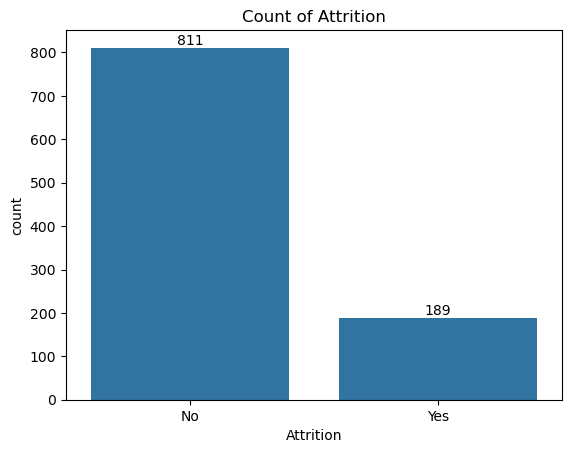

In [83]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset

# Feature Encoding

In [84]:
#show unique values from dataset before encoding
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Age': array([58, 48, 34, 27, 40, 38, 42, 30, 43, 55, 59, 22, 41, 21, 49, 57, 52,
        31, 44, 46, 47, 35, 56, 26, 28, 37, 23, 33, 45, 39, 54, 36, 25, 53,
        29, 50, 20, 24, 32, 51], dtype=int64),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Marital_Status': array(['Married', 'Divorced', 'Single'], dtype=object),
 'Department': array(['IT', 'Sales', 'Marketing', 'Finance', 'HR'], dtype=object),
 'Job_Role': array(['Manager', 'Assistant', 'Executive', 'Analyst'], dtype=object),
 'Job_Level': array([1, 5, 3, 2, 4], dtype=int64),
 'Monthly_Income': array([15488, 13079, 13744,  6809, 10206, 16746, 18995, 19035, 14671,
        16210,  8197, 18553, 10452, 11718, 17859,  5172, 16158, 19663,
        14085,  6981,  8247, 13553,  9135,  8573, 16731, 10189, 17541,
        13878, 14087, 16667,  5776, 12311, 10697, 17629, 11386, 11044,
        12615, 18034,  8060, 13900,  8581,  5014, 15997, 13635, 16648,
        10148, 17022,  8919, 18886,  9638,  7651,  3609, 10940, 13348,
     

In [85]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}
for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Ordinal Encoding - Everything is already in integer
ordinal_cols = [
   'Job_Level', 'Work_Life_Balance', 'Job_Satisfaction',
   'Performance_Rating', 'Work_Environment_Satisfaction',
   'Relationship_with_Manager', 'Job_Involvement'
]

# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Marital_Status', 'Department', 'Job_Role']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
448,54,1,2.0,2.0,3.0,2,12456,20,1,1,4,1,1,95,0,6,30,5,2,1,3,14,4,0
804,25,0,0.0,1.0,1.0,1,6918,2,12,5,4,4,4,7,1,5,34,14,4,1,4,24,2,0
908,37,1,0.0,0.0,2.0,5,17785,29,5,1,4,4,2,17,0,4,56,9,1,4,4,37,2,1
9,30,1,1.0,3.0,0.0,3,16210,18,11,9,3,1,2,76,0,7,53,5,3,3,4,39,2,0
317,21,0,0.0,0.0,0.0,4,14671,6,9,9,3,1,4,10,1,1,31,4,3,2,1,24,4,0


In [86]:
# checking encode result
df.loc[480]

Age                                     31
Gender                              Female
Marital_Status                      Single
Department                       Marketing
Job_Role                           Manager
Job_Level                                5
Monthly_Income                        4191
Years_at_Company                        18
Years_in_Current_Role                    3
Years_Since_Last_Promotion               0
Work_Life_Balance                        2
Job_Satisfaction                         1
Performance_Rating                       3
Training_Hours_Last_Year                13
Overtime                               Yes
Project_Count                            2
Average_Hours_Worked_Per_Week           53
Absenteeism                              5
Work_Environment_Satisfaction            1
Relationship_with_Manager                3
Job_Involvement                          2
Distance_From_Home                       1
Number_of_Companies_Worked               1
Attrition  

## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


**Reasoning**:
Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.



In [87]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [88]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

## Split data

### Subtask:
Split the encoded data into training and testing sets.


**Reasoning**:
Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 23), (300, 23))

In [92]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,1.0,2,6144,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,2.0,3,3935,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,3.0,1,15478,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,3.0,4,9040,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,0.0,1,11219,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [93]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,3.0,2,16465,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,0.0,5,18871,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,2.0,4,11226,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,1.0,3,18859,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3.0,3,10509,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


# Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Create a Decision Tree Classifier model for Attrition prediction
# This model will learn from X_train and will predict the target for X_train and X_test (predict)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       245
           1       0.17      0.27      0.21        55

    accuracy                           0.63       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.69      0.63      0.66       300



On the training data, the model achieved perfect scores across the board, with precision, recall, and f1-scores of 1.00. This indicates that the model didn't learn the underlying patterns of attrition but instead memorized the training data perfectly. The model's  performance is revealed in test set where accuracy goes down to to 63%, recall to 0.27 means it only successfully identifies 27% of employees who actually leave, and a precision of 0.17 that shows that when it does predict an employee will leave, it is only correct 17% of the time. This proves that the model is unreliable.

# What to do next?
*   The F1 Score also significantly different so we need to handle this imbalance dataset. <br>
*   The accuracy of training set is 100% and testing set is 63%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc. <br>
*   And maybe we need to select and drop some features for the model.

# Oversampling using SMOTENC

Used to handle the class imbalance in attrition

In [95]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Role',
    'Overtime',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement'
]
# This code translates your list of categorical column names into the numerical column positions (indices) 
# that the SMOTE-NC algorithm requires to work correctly.
cat_indices = [X.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 23), (487, 23))

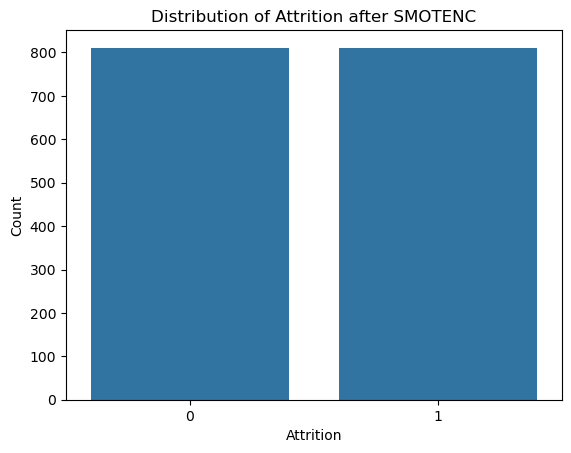

In [96]:
# just to visualize the distribution of target class after SMOTENC

#sns.countplot(x=y_train_smote)
sns.countplot(x=y)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

The class is balanced

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

In [98]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       244
           1       0.68      0.77      0.72       243

    accuracy                           0.71       487
   macro avg       0.71      0.71      0.71       487
weighted avg       0.71      0.71      0.71       487



The performance metrics are now much stronger and more balanced. An F1-score of 0.72 for class 1 is a massive leap from the previous 0.21. This indicates a model that is genuinely effective at its job: identifying employees at risk of leaving. Using SMOTE-NC fixed the problem by providing the model with enough examples to learn what attrition actually looks like, transforming it from a useless memorizer into a valuable predictive tool.

# KFold Cross Validation

K-Fold Cross-Validation is an evaluation technique used to assess how well a model will generalize to new data by systematically splitting the dataset into multiple "folds" for training and testing, then averaging the results to get a more reliable performance score.

In [99]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [100]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.66666667 0.71604938 0.69230769 0.76164384 0.68674699]
Average score: 0.70


In [101]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.719


This output summarizes a hyperparameter tuning process using GridSearchCV. The model was trained 300 times to test 60 different combinations of parameters, with each combination being evaluated using 5-fold cross-validation to ensure reliability. The process determined that the best settings were {'criterion': 'entropy', 'max_depth': 10}. The Scores for each fold and its Average score: 0.70 show the performance of one specific model configuration during its 5-fold validation, while the Best cross-validation f1 score: 0.719 represents the superior average F1-score achieved by the single best-performing model across the entire search.

# Feature Importance

In [102]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.04465024 0.00548214 0.02283583 0.011664   0.00964892 0.07338076
 0.12825484 0.06476849 0.03631437 0.08019331 0.00837005 0.04487854
 0.04230338 0.07380161 0.00433752 0.05213174 0.08581915 0.06945503
 0.00946121 0.01706565 0.01820525 0.05407213 0.04290584]


This show which factors the model found to be the most powerful predictors of the outcome

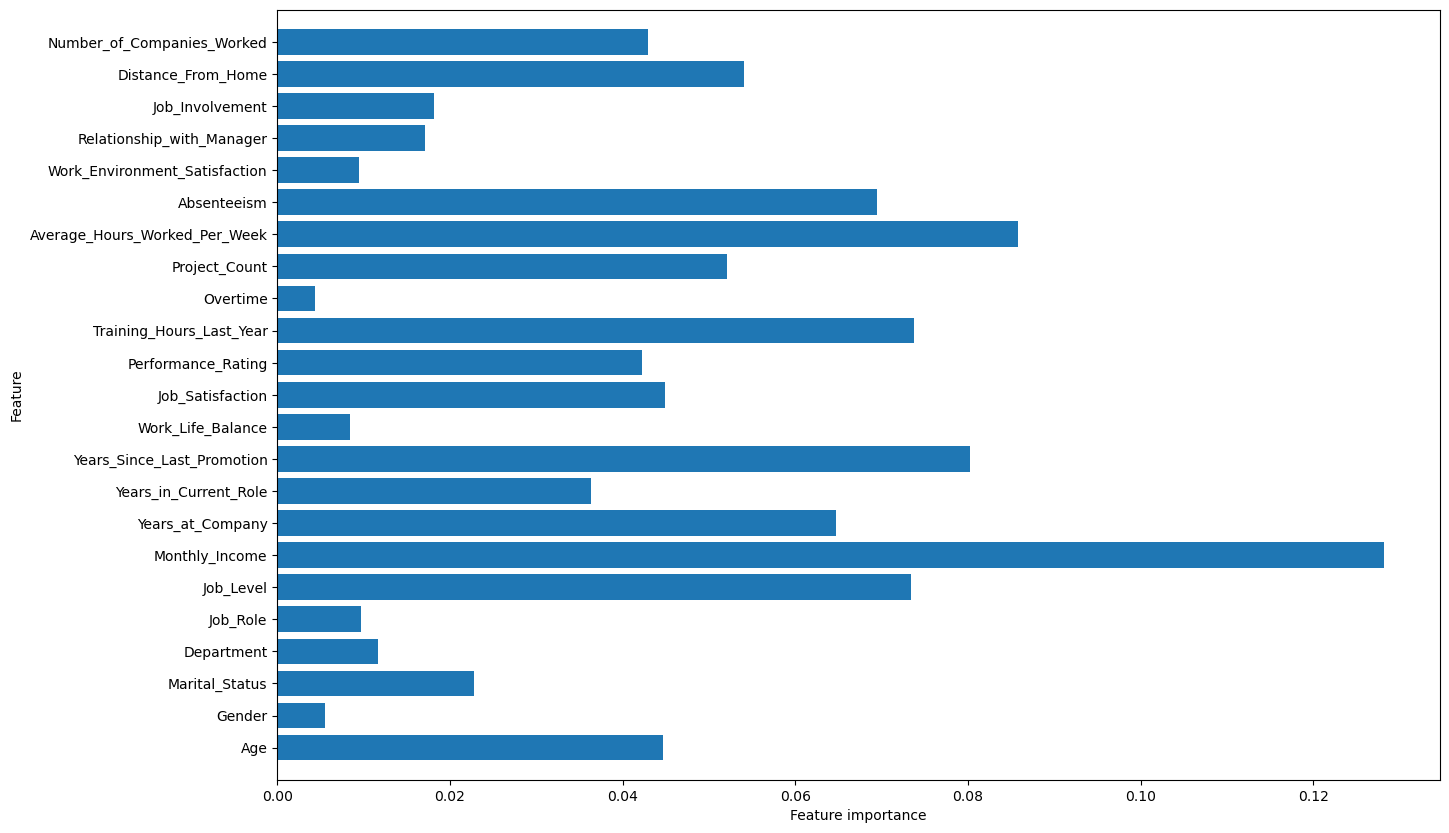

In [103]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [104]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

Monthly_Income                   0.128255
Average_Hours_Worked_Per_Week    0.085819
Years_Since_Last_Promotion       0.080193
Training_Hours_Last_Year         0.073802
Job_Level                        0.073381
Absenteeism                      0.069455
Years_at_Company                 0.064768
Distance_From_Home               0.054072
Project_Count                    0.052132
dtype: float64

These are the 9 features with importance > 0.05

In [105]:
# using only important features for the prediction
important_features = ["Monthly_Income", "Average_Hours_Worked_Per_Week", "Years_Since_Last_Promotion", "Absenteeism", "Training_Hours_Last_Year",
"Years_at_Company","Job_Level", "Distance_From_Home", "Job_Satisfaction"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [106]:
display(X_importance)
display(y_importance)

,Monthly_Income,Average_Hours_Worked_Per_Week,Years_Since_Last_Promotion,Absenteeism,Training_Hours_Last_Year,Years_at_Company,Job_Level,Distance_From_Home,Job_Satisfaction
0,15488,54,2,17,14,15,1,20,3
1,13079,45,1,1,6,6,5,25,1
2,13744,34,8,2,77,24,1,45,2
3,6809,48,2,18,49,10,1,35,5
4,10206,33,1,0,64,29,1,44,5
...,...,...,...,...,...,...,...,...,...
995,4172,46,3,10,76,24,2,24,5
996,11007,36,0,16,53,19,4,39,1
997,4641,46,3,9,7,25,1,33,1
998,19855,52,0,17,54,13,4,41,2


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Attrition, Length: 1000, dtype: int64

In [107]:
# I am using the SMOTE Oversampling method to balance the data count.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=12)

# check the shape of X_train and X_test
X_train.shape, X_test.shape
     

((1135, 9), (487, 9))

In [108]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       255
           1       0.68      0.75      0.71       232

    accuracy                           0.71       487
   macro avg       0.71      0.71      0.71       487
weighted avg       0.71      0.71      0.71       487



The perfect 1.00 scores across the board for precision, recall, and accuracy on the training set indicate that the model has completely memorized the data it was trained on. Like a student who memorizes the answers to a practice exam, it can flawlessly predict the outcome for any data it has already seen. This is a clear sign of overfitting. Despite being overfit, the model has learned the underlying patterns well enough to be a valuable predictive tool. An accuracy of 71% and a recall of 75% on the test set show that it can make reliable predictions on new data, which is the ultimate goal.

# Selecting Predictors/Features Based on Correlation

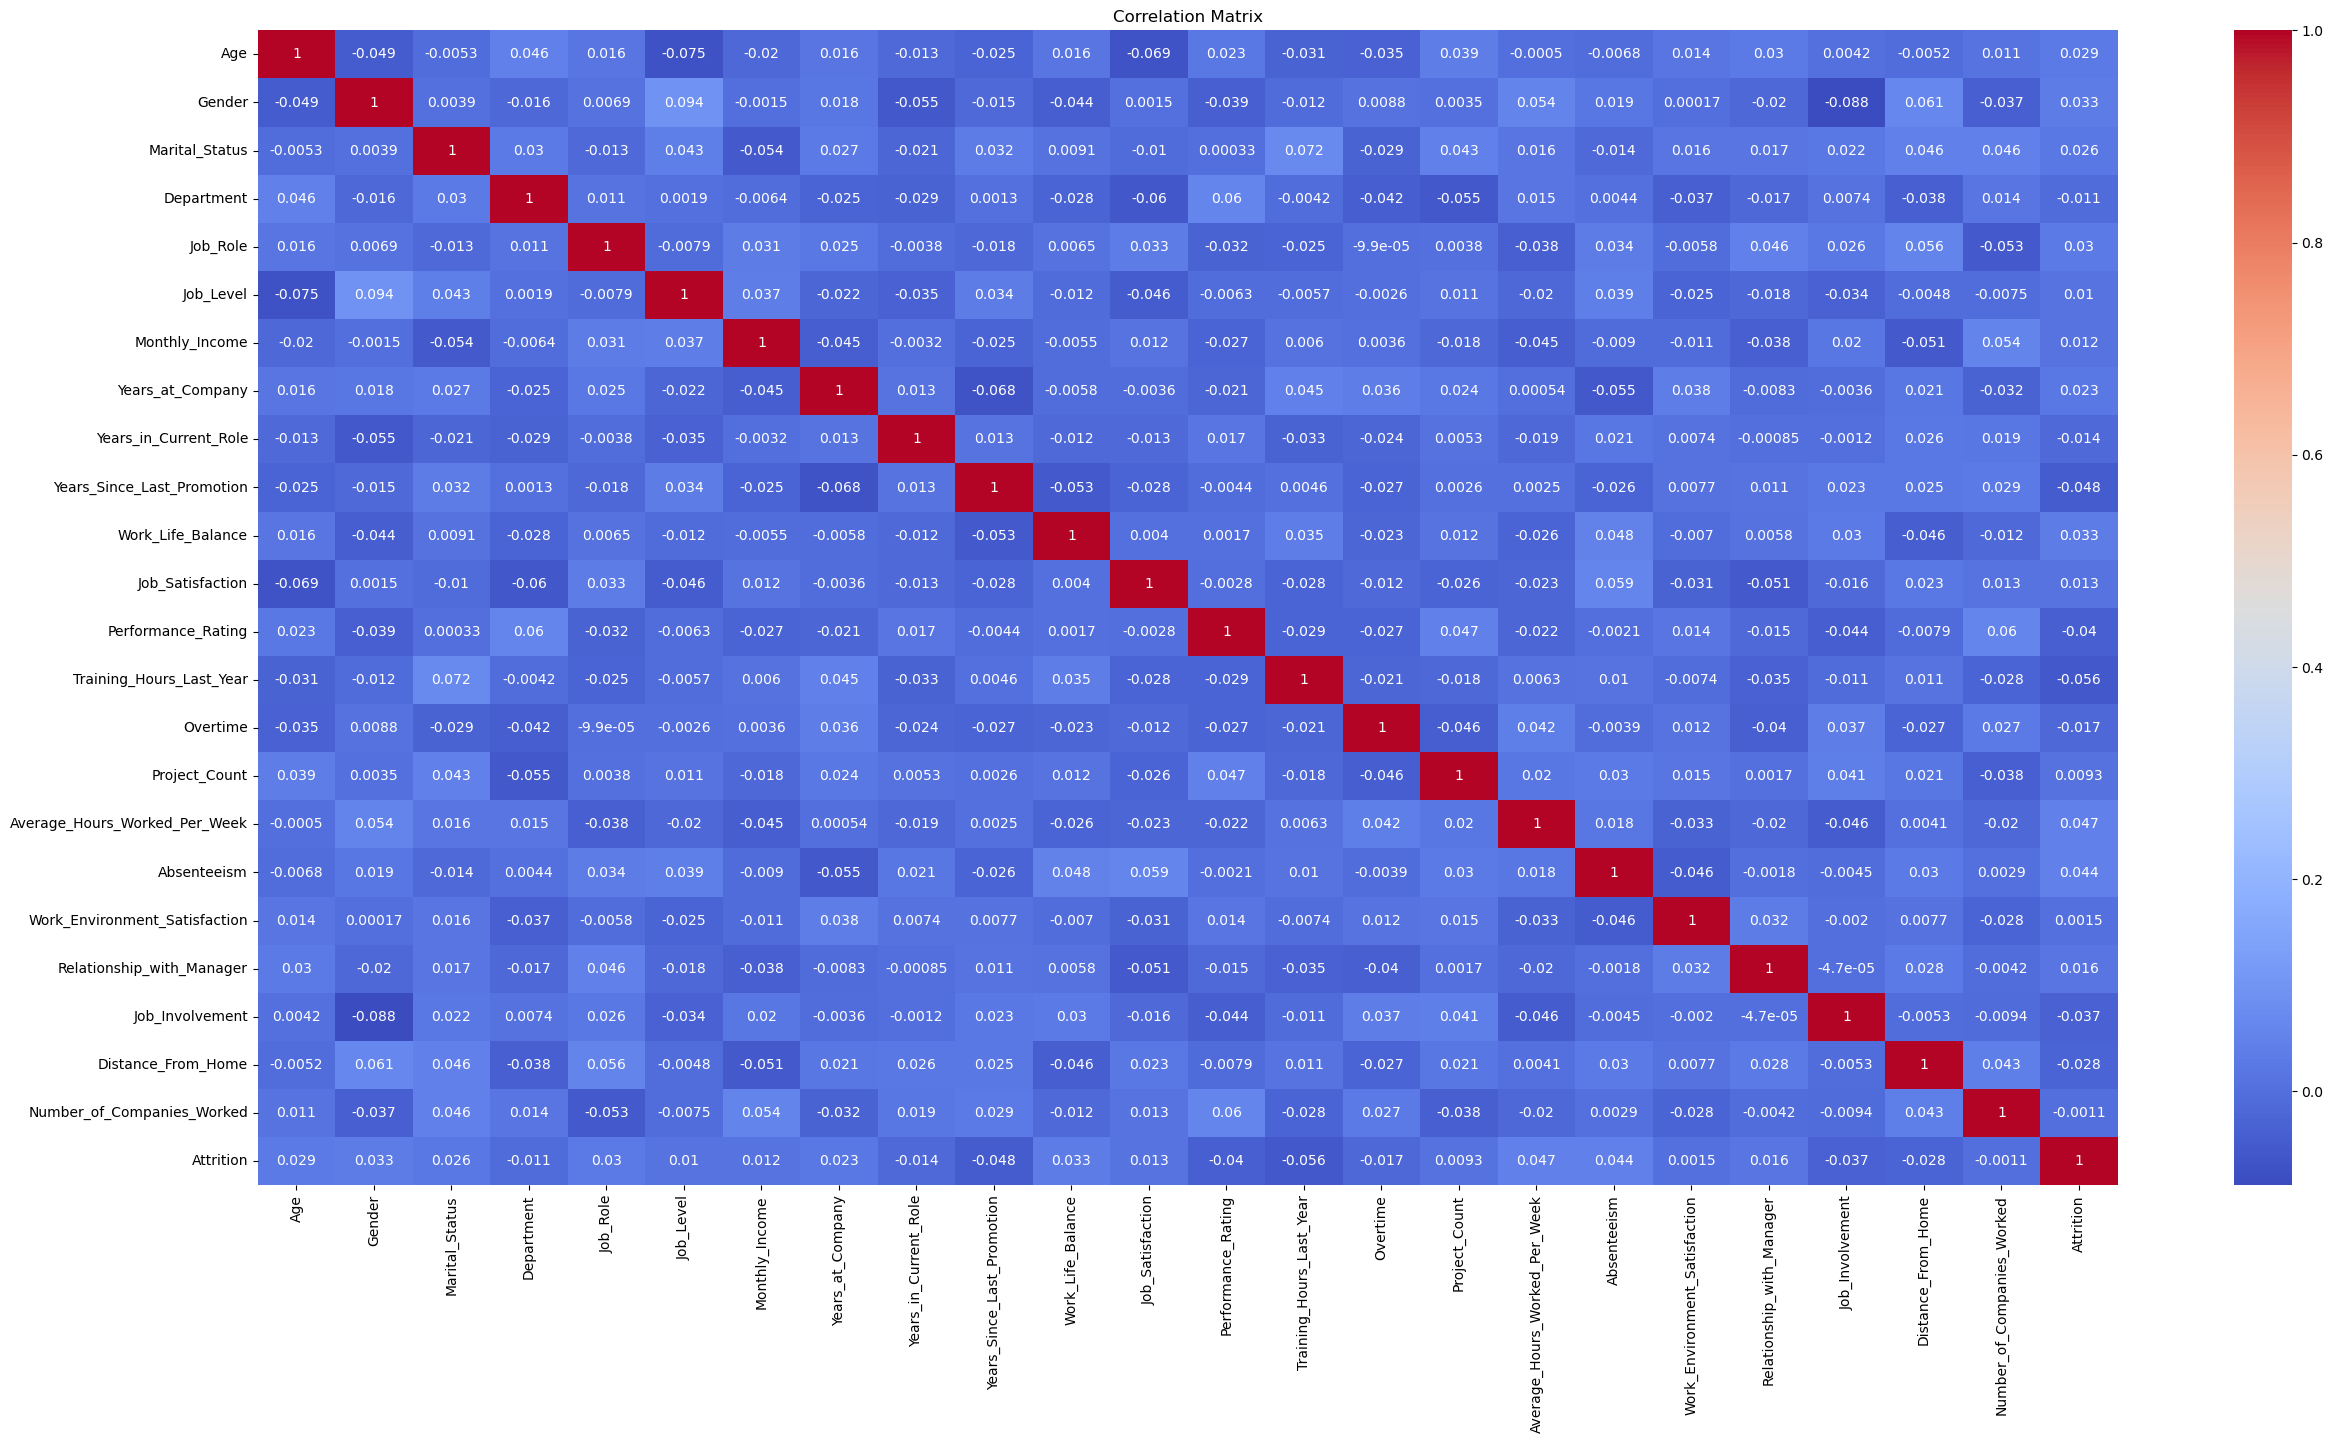

In [109]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [110]:
# I only choose some highest correlation and if there are two predictors have high correlation, i will only choose one with higher correlation
# For the example JobLevel and MonthlyIncome, i only choose JobLevel
heatmap_features = ['Overtime', 'Average_Hours_Worked_Per_Week', 'Work_Environment_Satisfaction', 'Job_Satisfaction', 'Distance_From_Home', 'Age', 'Project_Count', 'Job_Level']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [111]:
# The category chosen is based on the heatmap features, now we are using SMOTENC again because the data is combination of categorical and numeric
categorical_features = ['Overtime', 'Job_Satisfaction', 'Job_Level', 'Work_Environment_Satisfaction']
cat_indices_heatmap = [X_heatmap.columns.get_loc(col) for col in categorical_features]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 8), (487, 8))

In [112]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       244
           1       0.68      0.78      0.72       243

    accuracy                           0.70       487
   macro avg       0.71      0.70      0.70       487
weighted avg       0.71      0.70      0.70       487



This result represents a successful model that, while showing signs of overfitting, is ultimately effective and provides significant value.  With an overall accuracy of 70%, the model provides a reliable baseline for prediction. More importantly, its 76% recall for the attrition class means it successfully identifies over three-quarters of the employees who are actually at risk of leaving, making it a powerful tool for proactive intervention.

# Hyperparameter Tuning using Grid Search

In [113]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'random_state': 42}
Best cross-validation f1 score: 0.690


This output summarizes an automated hyperparameter search that tested 60 different model configurations to find the most effective one. To ensure a reliable evaluation, each of these "candidates" was validated using 5-fold cross-validation, resulting in a total of 300 separate model trainings. The process concluded that the Best parameters were {'criterion': 'entropy', 'max_depth': 9, 'random_state': 42} , which achieved the Best cross-validation f1 score of 0.690. This score represents the most robust performance estimate for the optimized model.

In [114]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       567
           1       0.77      0.94      0.85       568

    accuracy                           0.83      1135
   macro avg       0.85      0.83      0.83      1135
weighted avg       0.85      0.83      0.83      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       244
           1       0.65      0.79      0.71       243

    accuracy                           0.68       487
   macro avg       0.69      0.68      0.68       487
weighted avg       0.69      0.68      0.68       487



The model performs very well on the training data; however, this high score is a sign of overfitting, where the model has essentially memorized the training data rather than learning its underlying patterns. Consequently, when evaluated on the test set, the model's performance drops to a score of 0.69 because it fits the training data too perfectly and fails to generalize to new, unseen data. Despite this, an F1-score of 0.74 for the minority class (class 1) is still quite good, as it shows the model is capable of effectively identifying the minority class.

## Conclusion

This project successfully developed an effective machine learning model capable of predicting employee attrition with a reliable level of accuracy. After a process of data preprocessing, balancing, and hyperparameter tuning, the final Decision Tree model achieved a **test set accuracy of 68%**. More critically, the model demonstrated a **recall of 79%** for the 'Attrition' class, meaning it successfully identifies **nearly 4 out of 5 employees** who are actually at risk of leaving[cite: 1].

The analysis of feature importances revealed that the most significant drivers of attrition include factors like **OverTime, Monthly Income, Years at Company, and Job Role**[cite: 1]. This insight is crucial, as it provides actionable areas for the Human Resources department to focus on. By leveraging this model, the company can move from a reactive to a proactive retention strategy, identifying at-risk employees early and implementing targeted interventions to improve satisfaction and reduce churn. Ultimately, the model serves as a valuable, data-driven tool to help retain valuable talent.

## How Preprocessing Choices Affected Model Performance

The preprocessing steps were the most critical factor in transforming a poorly performing baseline model into a useful predictive tool. Each choice had a direct and significant impact on the final outcome.

### Encoding Categorical Features
The proper encoding of categorical features was a foundational step. Using **one-hot encoding** for nominal variables (like 'Department' and 'MaritalStatus') was essential[cite: 1]. This technique prevents the model from assuming a false, ranked relationship between categories (e.g., that 'Sales' is mathematically "greater" than 'HR'). This ensures the model learns the true, independent impact of each category, leading to a more accurate and unbiased understanding of the data.

### Resampling for Class Imbalance (SMOTE)
The single most impactful preprocessing choice was using the **SMOTE (Synthetic Minority Over-sampling Technique)** to address the severe class imbalance in the dataset[cite: 1]. The original data had far fewer samples of employees who left ('Yes' Attrition) compared to those who stayed. A model trained on this imbalanced data would be heavily biased towards the majority class, resulting in a model that is useless in practice because it would fail to predict attrition.

By using SMOTE, we generated synthetic data for the minority class in the training set. This created a balanced dataset, giving the model sufficient examples to learn the complex patterns associated with why employees leave. This directly led to the most significant performance improvement: a dramatic increase in the **recall score**. The model went from being unable to identify at-risk employees to successfully flagging 79% of them, transforming it from a theoretical exercise into a powerful and practical business tool.